In [1]:
import econpizza as ep
import matplotlib.pyplot as plt

In [2]:
model = ep.load('model.yaml', raise_errors=True, verbose=True)

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)


(load:) Parsing done.


In [3]:
_ = model.solve_stst()

/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/parser/__init__.py:262: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  init_wf = jnp.array(None)


    Iteration   1 | max. error 1.64e-01 | lapsed 0.1597
(solve_stst:) Steady state found (0.31721s). The solution converged.


In [4]:
model.steady_state

{'fixed_values': {'alpha': 0.3,
  'beta': 0.98,
  'delta': 0.025,
  'sigma': 1,
  'rho': 0.9,
  'abar': 1,
  'kbar': '((1-beta*(1-delta)) /(beta * alpha * abar))** ( 1/(alpha-1))',
  'cbar': 'abar * kbar**alpha - delta*kbar'},
 'init_guesses': {'c': 0, 'k': 1},
 'newton_result': {'success': True,
  'message': 'The solution converged.',
  'x': Array([-2.22044605e-16, -4.44089210e-16,  4.44089210e-16], dtype=float64),
  'niter': 2,
  'fun': Array([-3.15696071e-17,  2.37143638e-17, -2.22044605e-17], dtype=float64),
  'jac': Array([[-0.15136054,  0.12636054, -0.02040816],
         [-0.0445    ,  0.        ,  0.03115   ],
         [ 0.1       ,  0.        ,  0.        ]], dtype=float64),
  'det': None,
  'initial_values': {'guesses': {'a': 0.95, 'c': 0, 'k': 1},
   'fixed': {'abar': 1,
    'alpha': 0.3,
    'beta': 0.98,
    'cbar': 1.8750892501108354,
    'delta': 0.025,
    'kbar': 14.839198910702178,
    'rho': 0.9,
    'sigma': 1}}},
 'values_and_pars': ({'a': Array(-2.22044605e-16, dty

In [7]:
shk = ('e_a', 0.01 )

x, flag = model.find_path(shock=shk)

    Iteration   1 | max error 1.00e-02 | lapsed 0.0028s
    Iteration   2 | max error 7.27e-18 | lapsed 0.0042s
(find_path:) Stacking done (0.059s). The solution converged.


/Users/carlosortiz/econ_pizza_macro/venv/lib/python3.11/site-packages/econpizza/solvers/stacking.py:83: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  dist0 = jnp.array(init_dist) if init_dist is not None else jnp.array(


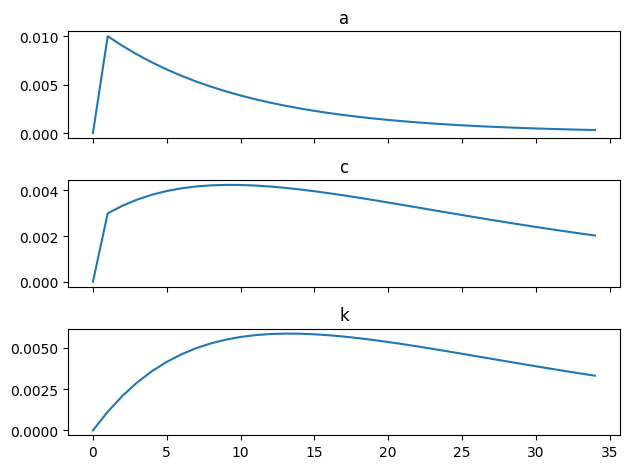

In [8]:
fig, axes = plt.subplots(3, 1, sharex=True)

vars = ['a', 'c', 'k']

for idx, ax in enumerate(axes):
    ax.plot(x[:35, idx])
    ax.set_title(vars[idx])

fig.tight_layout()


